In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
import numpy as np

In [2]:
from sklearn.metrics import r2_score

### Scatter Plot to see Trand between VO Consumption and Heart Disease MR
<p>Pulling two tables to merge and format to plot:</p>
<li>AllCountriesVegetableOilConsumptionPerCapita2007_2011</li>
<li>AllCountriesHeartDiseaseMortality2007_2011</li>

In [3]:
acvo = pd.read_csv('AllCountriesVegetableOilConsumptionPerCapita2007_2011.csv')

In [4]:
acmr = pd.read_csv('AllCountriesHeartDiseaseMortality2007_2011.csv')

In [5]:
euro = pd.read_csv('EuroWVOMR.csv')

In [6]:
euro

,Unnamed: 0,Entity,Year,Vegetable Oil,Deaths
0,0,Albania,2007,172.602740,339.928986
1,1,Armenia,2007,182.465753,410.791211
2,2,Austria,2007,542.465753,182.027111
3,3,Azerbaijan,2007,71.506849,632.724097
4,4,Belarus,2007,387.123288,533.504417
...,...,...,...,...,...
200,200,Sweden,2011,416.712329,153.603971
201,201,Switzerland,2011,495.616438,114.813790
202,202,Turkey,2011,613.972603,184.849933
203,203,Ukraine,2011,315.616438,546.286540


### Analyzing Data to convert to usefull format
<p>Our goal is to merge the tables. Therefore, I have to drop countries not contain in either column, and several other data manipulations.</p>

###### What I need?

<li>A index based on the Years 2007 to 2011</li>
<li>A top row based on the Countries</li>
<li>Values of MR and VO consumption</li>

###### All Countries VO consumption

In [7]:
acvo.shape

(160, 8)

In [8]:
acvo.head()

,Unnamed: 0,Countries,Units,2007,2008,2009,2010,2011
0,1,Afghanistan,kg,3.48,2.39,2.9,3.4,3.2
1,2,Albania,kg,7.00,6.30,7.0,5.7,5.4
2,3,Algeria,kg,13.60,13.70,12.3,13.3,14.9
3,4,Angola,kg,9.05,8.63,8.9,8.8,8.8
4,5,Argentina,kg,14.60,14.50,14.4,14.5,14.8


In [9]:
acvo.drop(columns=['Unnamed: 0', 'Units'], inplace=True)

In [10]:
acvo[acvo.loc[:,'2011'] == '...']

,Countries,2007,2008,2009,2010,2011
133,Sudan,5.62,5.48,6.1,5.5,...


In [11]:
acvo.drop(133, axis=0, inplace=True)

In [12]:
acvo[acvo.loc[:,'2011'] == '...']

,Countries,2007,2008,2009,2010,2011


In [13]:
acvo['2011'] = acvo['2011'].astype('float64')

In [14]:
acvo.dtypes

Countries     object
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
dtype: object

In [15]:
acvo.rename(columns={'Countries' : 'Entity'}, inplace=True)

In [16]:
acvo.head()

,Entity,2007,2008,2009,2010,2011
0,Afghanistan,3.48,2.39,2.9,3.4,3.2
1,Albania,7.00,6.30,7.0,5.7,5.4
2,Algeria,13.60,13.70,12.3,13.3,14.9
3,Angola,9.05,8.63,8.9,8.8,8.8
4,Argentina,14.60,14.50,14.4,14.5,14.8


In [17]:
acvo.columns

Index(['Entity', '2007', '2008', '2009', '2010', '2011'], dtype='object')

In [18]:
acvo = pd.melt(acvo, id_vars=["Entity"])

In [19]:
acvo.head()

,Entity,variable,value
0,Afghanistan,2007,3.48
1,Albania,2007,7.00
2,Algeria,2007,13.60
3,Angola,2007,9.05
4,Argentina,2007,14.60


In [20]:
acvo.rename(columns={'variable' : 'Year', 'value' : 'Vegetable Oil'}, inplace=True)

In [21]:
acvo.head()

,Entity,Year,Vegetable Oil
0,Afghanistan,2007,3.48
1,Albania,2007,7.00
2,Algeria,2007,13.60
3,Angola,2007,9.05
4,Argentina,2007,14.60


In [22]:
country_list = acvo.Entity.unique()

In [23]:
country_list = [country for country in country_list]

In [24]:
len(country_list)

159

In [25]:
acvo['Vegetable Oil'].dtypes

dtype('float64')

In [26]:
acvo['Vegetable Oil'].head()

0     3.48
1     7.00
2    13.60
3     9.05
4    14.60
Name: Vegetable Oil, dtype: float64

In [27]:
acvo['Vegetable Oil'] *= 1000

In [28]:
acvo['Vegetable Oil'] /= 365

In [29]:
acvo['Vegetable Oil'] *= 9

In [30]:
# Checking data with other tables
acvo[acvo['Entity'] == 'France']

,Entity,Year,Vegetable Oil
49,France,2007,507.945205
208,France,2008,517.808219
367,France,2009,530.136986
526,France,2010,520.273973
685,France,2011,517.808219


In [31]:
acvo['Year'] = acvo['Year'].astype('int64')

###### All Countries Heart Disease MR

In [32]:
acmr.shape

(1155, 5)

In [33]:
acmr.head()

,Unnamed: 0,Entity,Code,Year,Deaths
0,0,Afghanistan,AFG,2007,707.188774
1,1,Afghanistan,AFG,2008,693.448663
2,2,Afghanistan,AFG,2009,677.845507
3,3,Afghanistan,AFG,2010,662.616946
4,4,Afghanistan,AFG,2011,649.725628


In [34]:
acmr.drop(columns=['Unnamed: 0', 'Code'], inplace=True)

In [38]:
dfi.export(acmr.head(), 'allcountry.png')

In [45]:
# acmr = acmr.pivot(index='Year', columns='Entity', values='Deaths')

### Merge Data sets

In [27]:
acmr.dtypes

Entity     object
Year        int64
Deaths    float64
dtype: object

In [28]:
acvo.dtypes

Entity            object
Year               int64
Vegetable Oil    float64
dtype: object

In [29]:
mergeVOMR = pd.merge(acvo, acmr)

In [30]:
mergeVOMR.shape

(740, 4)

In [31]:
mergeVOMR['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iraq', 'Iran', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Lithua

In [32]:
mergeVOMR.to_csv('ADmergeVOM.csv')

###### Both Data sets contained a total of 147 countries in common (without counting the world row)

In [138]:
len(mergeVOMR.Entity.unique())

148

In [143]:
#No null values them
mergeVOMR.isnull().sum()

Entity           0
Year             0
Vegetable Oil    0
Deaths           0
dtype: int64

### Time to plot

In [144]:
#here is how the data looks
mergeVOMR.head()

,Entity,Year,Vegetable Oil,Deaths
0,Afghanistan,2007,85.808219,707.188774
1,Albania,2007,172.602740,339.928986
2,Algeria,2007,335.342466,328.078554
3,Angola,2007,223.150685,344.017796
4,Argentina,2007,360.000000,220.586059


In [150]:
dfi.export(mergeVOMR.loc[:,'Vegetable Oil':].describe(), 'vegetableOilAndDeaths.png')

In [232]:
mergeVOMR.loc[:,'Vegetable Oil':].describe()

,Vegetable Oil,Deaths
count,740.000000,740.000000
mean,284.938467,288.899940
std,147.470026,136.808543
min,24.657534,89.784507
25%,179.691781,181.286112
50%,261.369863,261.861644
75%,384.657534,360.329894
max,821.095890,791.334881


In [151]:
#Setting the X and the Y Variables
x = mergeVOMR['Deaths']
y = mergeVOMR['Vegetable Oil']

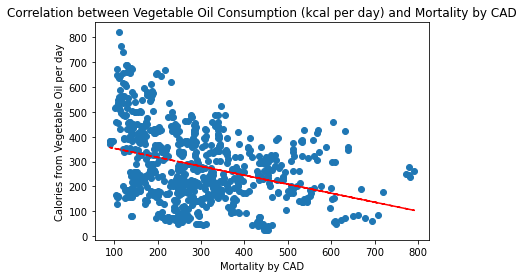

In [197]:
plt.title('Correlation between Vegetable Oil Consumption (kcal per day) and Mortality by CAD')
plt.ylabel('Calories from Vegetable Oil per day')
plt.xlabel('Mortality by CAD')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.savefig('CorrelationVOMR.png', dpi=200, bbox_inches='tight')

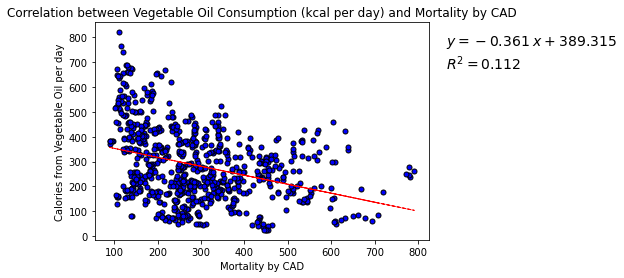

In [224]:
plt.title('Correlation between Vegetable Oil Consumption (kcal per day) and Mortality by CAD')
plt.ylabel('Calories from Vegetable Oil per day')
plt.xlabel('Mortality by CAD')
plt.plot(x,y,"b.", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.savefig('CorrelationVOMR.png', dpi=200, bbox_inches='tight')

### 10 European Countries List

In [36]:
tenE_list = ['France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Russia',
       'Spain', 'Switzerland', 'Turkey', 'United Kingdom']

In [37]:
tenE_list

['France',
 'Germany',
 'Italy',
 'Netherlands',
 'Poland',
 'Russia',
 'Spain',
 'Switzerland',
 'Turkey',
 'United Kingdom']

In [38]:
mergeEuro = mergeVOMR[mergeVOMR['Entity'].isin(tenE_list)]

In [40]:
mergeEuro.to_csv('mergeEuro.csv')

In [185]:
xx = mergeEuro['Deaths']
yy = mergeEuro['Vegetable Oil']

In [231]:
dfi.export(mergeEuro.loc[:, 'Vegetable Oil' :'Deaths'].describe(), 'mergeEuroStats.png')

In [233]:
mergeEuro.loc[:, 'Vegetable Oil' :'Deaths'].describe()

,Vegetable Oil,Deaths
count,50.000000,50.000000
mean,486.493151,196.486640
std,140.447929,135.247507
min,276.164384,101.182683
25%,390.205479,125.727912
50%,461.095890,138.600611
75%,574.520548,186.434305
max,821.095890,608.128850


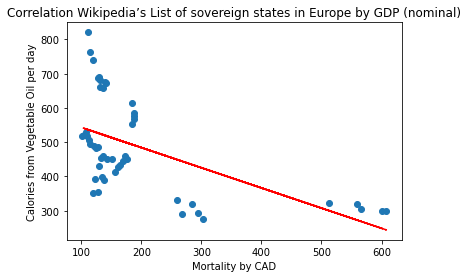

In [194]:
plt.title('Correlation Wikipedia’s List of sovereign states in Europe by GDP (nominal)')
plt.ylabel('Calories from Vegetable Oil per day')
plt.xlabel('Mortality by CAD')
plt.scatter(xx, yy)
z = np.polyfit(xx, yy, 1)
p = np.poly1d(z)
plt.plot(xx,p(xx),"r--")
# plt.savefig('CorrelationEURO.png', dpi=200, bbox_inches='tight')

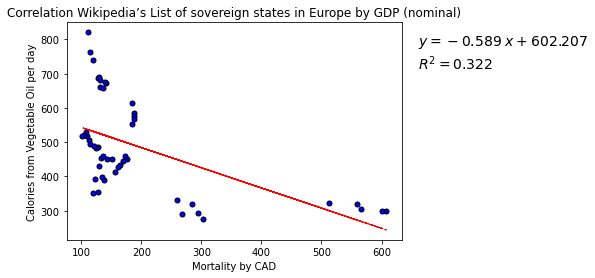

In [223]:
plt.title('Correlation Wikipedia’s List of sovereign states in Europe by GDP (nominal)')
plt.ylabel('Calories from Vegetable Oil per day')
plt.xlabel('Mortality by CAD')
plt.plot(xx,yy,"b.", ms=10, mec="k")
z = np.polyfit(xx, yy, 1)
y_hat = np.poly1d(z)(xx)

plt.plot(xx, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(yy,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.savefig('CorrelationEuro.png', dpi=200, bbox_inches='tight')

### Euro Regression line

In [45]:
euro

,Unnamed: 0,Entity,Year,Vegetable Oil
0,0,Albania,2007,172.602740
1,1,Armenia,2007,182.465753
2,2,Austria,2007,542.465753
3,3,Azerbaijan,2007,71.506849
4,4,Belarus,2007,387.123288
...,...,...,...,...
200,200,Sweden,2011,416.712329
201,201,Switzerland,2011,495.616438
202,202,Turkey,2011,613.972603
203,203,Ukraine,2011,315.616438


In [63]:
filterDSpain = euro[euro.loc[:, 'Entity'] != 'Spain']['Deaths']
filterMSpain = euro[euro.loc[:, 'Entity'] != 'Spain']['Vegetable Oil']

In [64]:
xxx = filterDSpain
yyy = filterMSpain

Text(1.05, 0.95, '$y=-0.448\\;x+481.954$\n$R^2 = 0.225$')

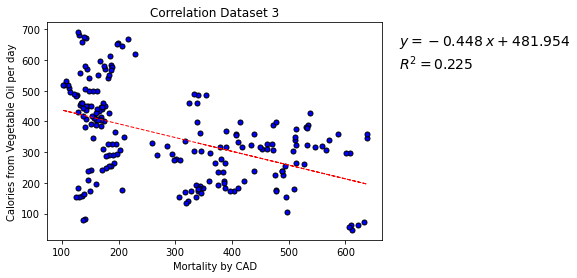

In [65]:
plt.title('Correlation Dataset 3')
plt.ylabel('Calories from Vegetable Oil per day')
plt.xlabel('Mortality by CAD')
plt.plot(xxx,yyy,"b.", ms=10, mec="k")
z = np.polyfit(xxx, yyy, 1)
y_hat = np.poly1d(z)(xxx)

plt.plot(xxx, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(yyy,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
#plt.savefig('CorrelationDataset3.png', dpi=200, bbox_inches='tight')